In [8]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as pl


In [9]:
file = "./data from book/BrainCancer.csv"
data = pd.read_csv(file)
data.head()


,Unnamed: 0,sex,diagnosis,loc,ki,gtv,stereo,status,time
0,1,Female,Meningioma,Infratentorial,90,6.11,SRS,0,57.64
1,2,Male,HG glioma,Supratentorial,90,19.35,SRT,1,8.98
2,3,Female,Meningioma,Infratentorial,70,7.95,SRS,0,26.46
3,4,Female,LG glioma,Supratentorial,80,7.61,SRT,1,47.80
4,5,Male,HG glioma,Supratentorial,90,5.06,SRT,1,6.30


In [10]:
ls = []
leadger = []
def categorical_data(x):
    if x not in ls:
        ls.append(x)
    return ls.index(x)

data['diagnosis'] = data['diagnosis'].apply(categorical_data)
leadger.append(ls)
ls =[]
data['loc'] = data['loc'].apply(categorical_data)
leadger.append(ls)
ls =[]
data['stereo'] = data['stereo'].apply(categorical_data)
leadger.append(ls)
ls =[]
data['sex'] = data['sex'].apply(categorical_data)
leadger.append(ls)
ls =[]
print(leadger)
# data
x_data = np.array(data[['diagnosis','loc','stereo','sex','ki','gtv']])
y_data = np.array(data['status'])

[['Meningioma', 'HG glioma', 'LG glioma', nan, 'Other'], ['Infratentorial', 'Supratentorial'], ['SRS', 'SRT'], ['Female', 'Male']]


array([[0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 9.000e+01, 6.110e+00],
       [1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 9.000e+01, 1.935e+01],
       [0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 7.000e+01, 7.950e+00],
       [2.000e+00, 1.000e+00, 1.000e+00, 0.000e+00, 8.000e+01, 7.610e+00],
       [1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 9.000e+01, 5.060e+00],
       [0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 8.000e+01, 4.820e+00],
       [0.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 8.000e+01, 3.190e+00],
       [2.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 8.000e+01, 1.237e+01],
       [0.000e+00, 1.000e+00, 1.000e+00, 0.000e+00, 7.000e+01, 1.216e+01],
       [1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+02, 2.530e+00],
       [2.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 8.000e+01, 1.400e-01],
       [0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 9.000e+01, 6.540e+00],
       [0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 9.000e+01, 6.300e-01],
       [3.000e+00, 1.000e

C:\Users\DINO\AppData\Local\Temp\ipykernel_1976\58001190.py:6: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


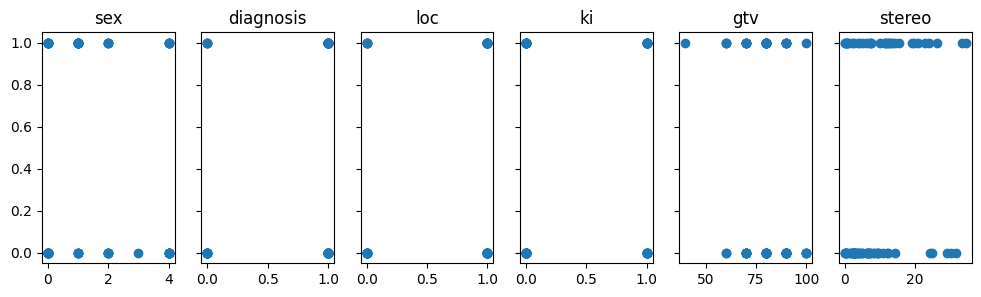

In [12]:
x_features = ['sex'	,'diagnosis','loc',	'ki',"gtv",	"stereo"]
fig,ax=pl.subplots(1, 6, figsize=(12, 3), sharey=True)
for i in range(x_data.shape[1]):
    ax[i].scatter(x_data[:,i], y_data)
    ax[i].set_title(x_features[i])
fig.show()
    